In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [17]:
#uploaded the data set
data=pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [18]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [19]:
data.shape

(1000, 40)

In [20]:
data=data.drop(['_c39'],1) 

In [21]:
data.shape

(1000, 39)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [23]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [31]:
data=data.drop(['age','policy_number','policy_bind_date','policy_state','insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day','incident_date','auto_make','auto_model','auto_year'],1)

In [32]:
data.shape

(1000, 22)

finding the question marks in the data

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_zip                  1000 non-null   int64  
 6   capital-gains                1000 non-null   int64  
 7   capital-loss                 1000 non-null   int64  
 8   incident_type                1000 non-null   object 
 9   collision_type               1000 non-null   object 
 10  incident_severity            1000 non-null   object 
 11  authorities_contacted        1000 non-null   object 
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  property_damage    

In [35]:
data.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [36]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [37]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [38]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [39]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [40]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [41]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [42]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [43]:
data['collision_type']=data['collision_type'].replace('?','Nan')

In [44]:
data['property_damage']=data['property_damage'].replace('?','Nan')

In [45]:
data['police_report_available']=data['police_report_available'].replace('?','Nan')

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['policy_csl'])
data['policy_csl']=df1

In [49]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data['incident_type'])
data['incident_type']=df2

In [50]:
lab_enc=LabelEncoder()
df3=lab_enc.fit_transform(data['collision_type'])
data['collision_type']=df3

In [51]:
lab_enc=LabelEncoder()
df4=lab_enc.fit_transform(data['incident_severity'])
data['incident_severity']=df4

In [52]:
lab_enc=LabelEncoder()
df5=lab_enc.fit_transform(data['authorities_contacted'])
data['authorities_contacted']=df5

In [53]:
lab_enc=LabelEncoder()
df6=lab_enc.fit_transform(data['property_damage'])
data['property_damage']=df6

In [54]:
lab_enc=LabelEncoder()
df7=lab_enc.fit_transform(data['police_report_available'])
data['police_report_available']=df7

In [55]:
lab_enc=LabelEncoder()
df8=lab_enc.fit_transform(data['fraud_reported'])
data['fraud_reported']=df8

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   int32  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_zip                  1000 non-null   int64  
 6   capital-gains                1000 non-null   int64  
 7   capital-loss                 1000 non-null   int64  
 8   incident_type                1000 non-null   int32  
 9   collision_type               1000 non-null   int32  
 10  incident_severity            1000 non-null   int32  
 11  authorities_contacted        1000 non-null   int32  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  property_damage    

In [57]:
data.describe()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.172000,1.590000,...,1.83900,0.964000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000
std,115.113174,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.081474,1.141579,...,1.01888,0.799589,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,0.431483
min,0.000000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000
25%,115.750000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,0.000000,0.000000,...,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000
50%,199.500000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.000000,2.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000
75%,276.250000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2.000000,3.000000,...,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000
max,479.000000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,3.000000,3.000000,...,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000


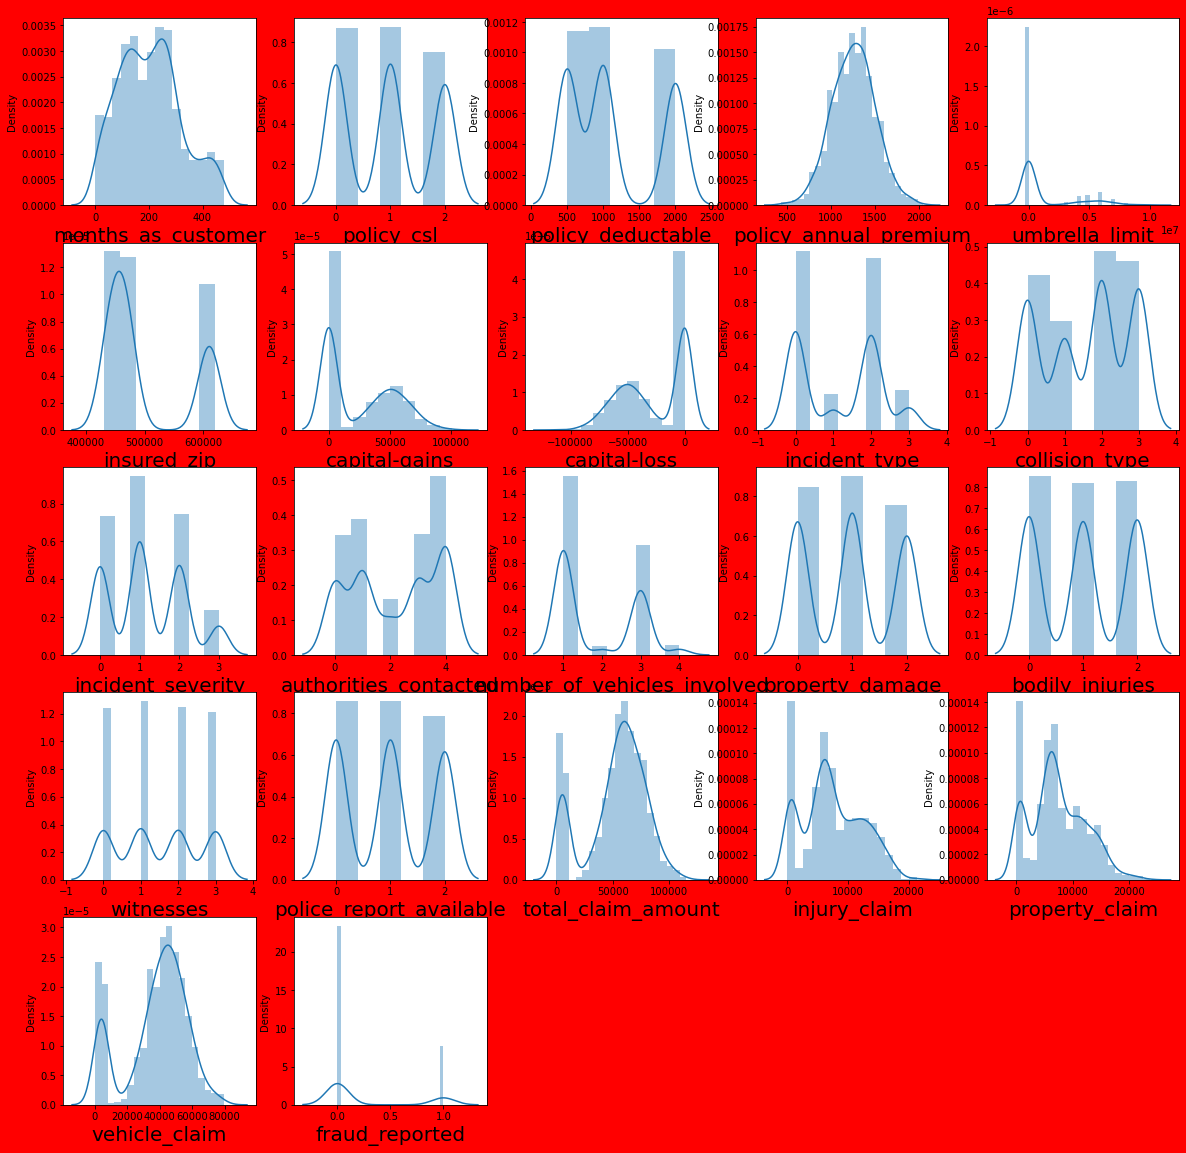

In [59]:
plt.figure(figsize=(20,20),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

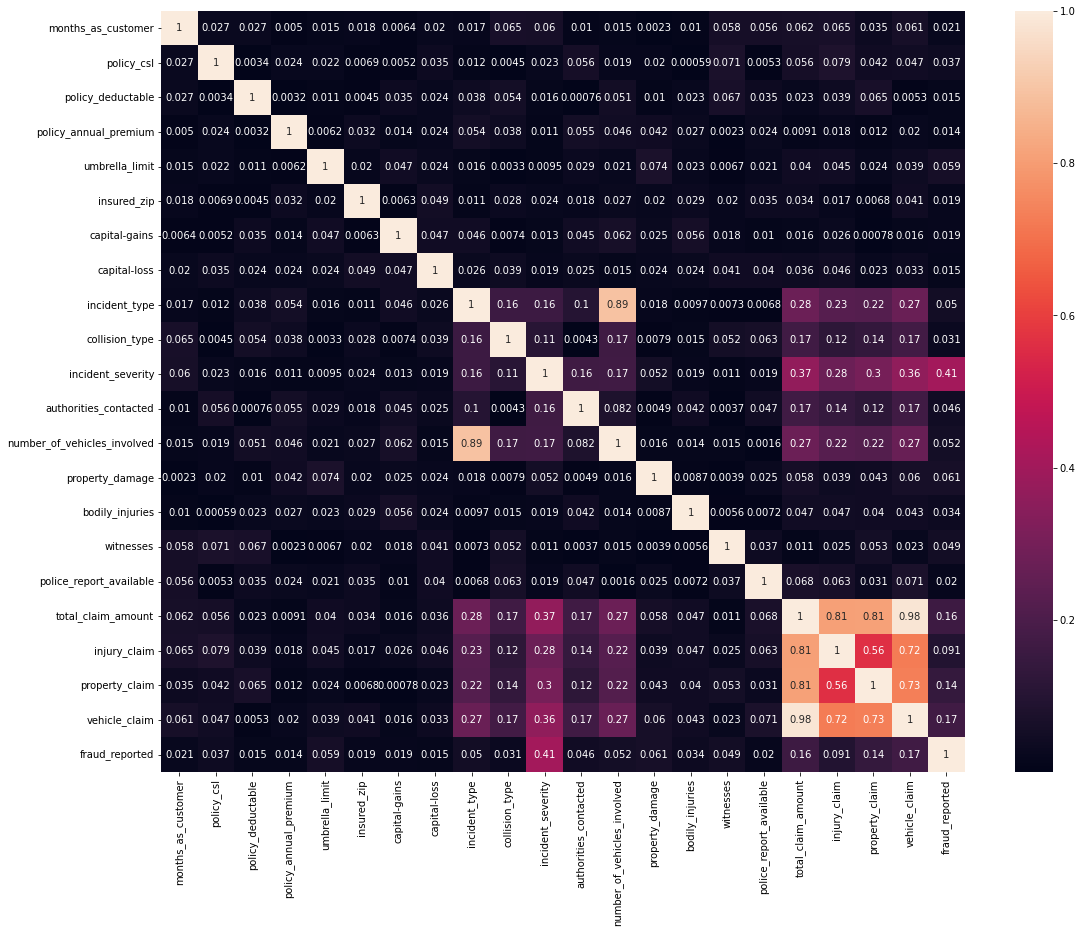

In [60]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

In [61]:
data=data.drop(['incident_type','total_claim_amount'],axis=1)

In [62]:
#features and label has been separated 
X=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

In [63]:
#appling train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=41)
y_train.head()

75     0
119    0
492    0
646    0
763    1
Name: fraud_reported, dtype: int32

# LOGISTIC REGRESSION

In [64]:
#applying logistic regression because label have categorical data and their is only two category in label either yes or no
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred=log_reg.predict(x_test)

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [68]:
#finding accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.68

In [69]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[168,   1],
       [ 79,   2]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report

In [71]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       169
           1       0.67      0.02      0.05        81

    accuracy                           0.68       250
   macro avg       0.67      0.51      0.43       250
weighted avg       0.68      0.68      0.56       250



# DECISION TREES

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
clf.score(x_train,y_train)

1.0

In [75]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.68

# RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=20, random_state=0)

In [78]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [79]:
y_pred2 = rfc.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1])

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[159  10]
 [ 54  27]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       169
           1       0.73      0.33      0.46        81

    accuracy                           0.74       250
   macro avg       0.74      0.64      0.65       250
weighted avg       0.74      0.74      0.71       250

0.744


# HYPERPARAMETER TUNING

In [82]:
rc = RandomForestClassifier(random_state=26)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4, 6,9,13],
    'min_samples_leaf': [2, 3, 4, 5,],
    'criterion': ["gini", "entropy"]
}

In [85]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rc, 
                           param_grid=params, 
                           cv=6, n_jobs=-1, scoring = "accuracy")

In [86]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 9, 13],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='accuracy')

In [87]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, random_state=26)

In [88]:
gd=grid_search.best_estimator_

In [89]:
rfc = RandomForestClassifier(max_depth=9, min_samples_leaf=3, random_state=26)

In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, random_state=26)

In [100]:
rfc.score(x_train,y_train)

0.932

In [101]:
y_pred3=rfc.predict(x_test)

In [102]:
cfm=confusion_matrix(y_test,y_pred3)
cfm

array([[156,  13],
       [ 50,  31]], dtype=int64)

In [105]:
print(classification_report(y_test,y_pred3,digits=2))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       169
           1       0.70      0.38      0.50        81

    accuracy                           0.75       250
   macro avg       0.73      0.65      0.66       250
weighted avg       0.74      0.75      0.72       250



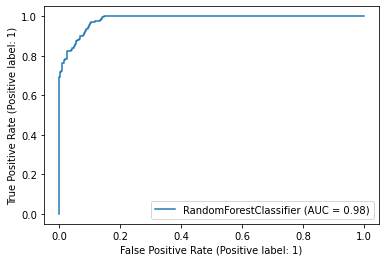

In [108]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(rfc,x_train,y_train)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

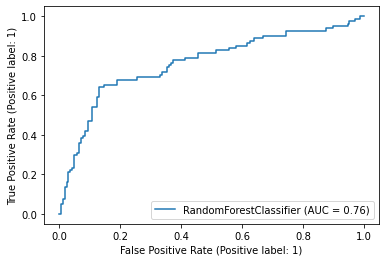

In [109]:
disp=plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [110]:
import pickle

In [111]:
filename='Automobile_insurance_fraud'
pickle.dump(clf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))